In [74]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



In [17]:
train = pd.read_excel("./data/DamDataExcel.xlsx", usecols=['Date', 'Omerli', 'Darlik', 'Elmali', 'Terkos', 'Alibey',
       'Buyukcekmece', 'Sazlidere', 'Kazandere', 'Pabucdere', 'Istrancalar'])

In [18]:
train.head()

,Date,Omerli,Darlik,Elmali,Terkos,Alibey,Buyukcekmece,Sazlidere,Kazandere,Pabucdere,Istrancalar
0,2017-01-01T00:00:00,"81,07%","72,94%","0,52%","44,45%","56,18%","33,13%","34,07%","28,84%","13,07%","40,24%"
1,2017-02-01T00:00:00,"82,16%","74,11%","0,51%","44,93%","58,38%","33,63%","34,64%","28,57%","12,99%","34,68%"
2,2017-03-01T00:00:00,"82,63%","74,59%","0,51%","45,09%","59,26%","33,63%","34,87%","28,17%","12,93%","29,18%"
3,2017-04-01T00:00:00,"82,79%","75,07%","0,52%","45,25%","59,79%","33,80%","35,10%","27,97%","12,84%","23,32%"
4,2017-05-01T00:00:00,"82,94%","75,49%","0,52%","45,57%","60,42%","33,80%","35,39%","27,97%","13,10%","26,85%"


## Preprocessing

In [20]:
train["Date"] = pd.to_datetime(train["Date"])

In [21]:
train.dtypes

Date            datetime64[ns]
Omerli                  object
Darlik                  object
Elmali                  object
Terkos                  object
Alibey                  object
Buyukcekmece            object
Sazlidere               object
Kazandere               object
Pabucdere               object
Istrancalar             object
dtype: object

In [23]:
train = train.replace(',', '.', regex=True)
train['Omerli'] = train['Omerli'].str.rstrip('%').astype('float') / 100.0
train['Darlik'] = train['Darlik'].str.rstrip('%').astype('float') / 100.0
train['Elmali'] = train['Elmali'].str.rstrip('%').astype('float') / 100.0
train['Terkos'] = train['Terkos'].str.rstrip('%').astype('float') / 100.0
train['Alibey'] = train['Alibey'].str.rstrip('%').astype('float') / 100.0
train['Buyukcekmece'] = train['Buyukcekmece'].str.rstrip('%').astype('float') / 100.0
train['Sazlidere'] = train['Sazlidere'].str.rstrip('%').astype('float') / 100.0
train['Kazandere'] = train['Kazandere'].str.rstrip('%').astype('float') / 100.0
train['Pabucdere'] = train['Pabucdere'].str.rstrip('%').astype('float') / 100.0
train['Istrancalar'] = train['Istrancalar'].str.rstrip('%').astype('float') / 100.0

## Some Feature Engineering

In [26]:
train['Month'] = train['Date'].dt.month

In [27]:
train['Quarter'] = train['Date'].dt.quarter

In [29]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Create a column for the season of the year
train['Season'] = train['Month'].apply(get_season)

In [30]:
train.head()

,Date,Omerli,Darlik,Elmali,Terkos,Alibey,Buyukcekmece,Sazlidere,Kazandere,Pabucdere,Istrancalar,Month,Quarter,Season
0,2017-01-01,0.8107,0.7294,0.0052,0.4445,0.5618,0.3313,0.3407,0.2884,0.1307,0.4024,1,1,Winter
1,2017-02-01,0.8216,0.7411,0.0051,0.4493,0.5838,0.3363,0.3464,0.2857,0.1299,0.3468,2,1,Winter
2,2017-03-01,0.8263,0.7459,0.0051,0.4509,0.5926,0.3363,0.3487,0.2817,0.1293,0.2918,3,1,Spring
3,2017-04-01,0.8279,0.7507,0.0052,0.4525,0.5979,0.3380,0.3510,0.2797,0.1284,0.2332,4,2,Spring
4,2017-05-01,0.8294,0.7549,0.0052,0.4557,0.6042,0.3380,0.3539,0.2797,0.1310,0.2685,5,2,Spring


## Train-Test Split

In [32]:
test = train[train["Date"].dt.year == 2020]

In [33]:
test.shape

(366, 14)

In [34]:
train = train[train["Date"].dt.year != 2020]

In [35]:
train.shape

(1095, 14)

In [40]:
train = pd.get_dummies(train, columns=['Season'])

In [38]:
test = pd.get_dummies(test, columns=['Season'])

In [44]:
train.head()

,Date,Omerli,Darlik,Elmali,Terkos,Alibey,Buyukcekmece,Sazlidere,Kazandere,Pabucdere,Istrancalar,Month,Quarter,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2017-01-01,0.8107,0.7294,0.0052,0.4445,0.5618,0.3313,0.3407,0.2884,0.1307,0.4024,1,1,0,0,0,1
1,2017-02-01,0.8216,0.7411,0.0051,0.4493,0.5838,0.3363,0.3464,0.2857,0.1299,0.3468,2,1,0,0,0,1
2,2017-03-01,0.8263,0.7459,0.0051,0.4509,0.5926,0.3363,0.3487,0.2817,0.1293,0.2918,3,1,0,1,0,0
3,2017-04-01,0.8279,0.7507,0.0052,0.4525,0.5979,0.3380,0.3510,0.2797,0.1284,0.2332,4,2,0,1,0,0
4,2017-05-01,0.8294,0.7549,0.0052,0.4557,0.6042,0.3380,0.3539,0.2797,0.1310,0.2685,5,2,0,1,0,0


## Feature-Target

In [43]:
features = ['Month', 'Quarter', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']
targets = ['Omerli', 'Darlik', 'Elmali', 'Terkos', 'Alibey', 'Buyukcekmece', 'Sazlidere', 'Kazandere', 'Pabucdere', 'Istrancalar']

In [46]:
X_train = train[features]
y_train = train[targets]

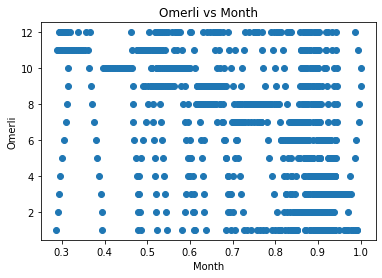

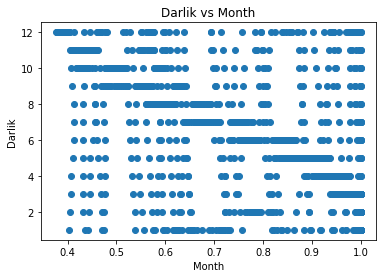

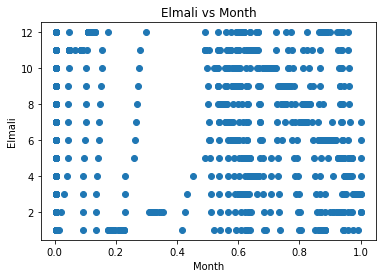

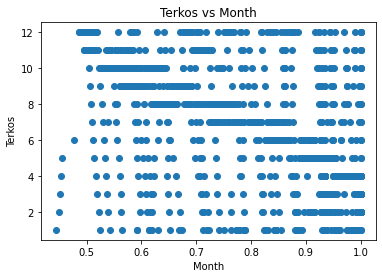

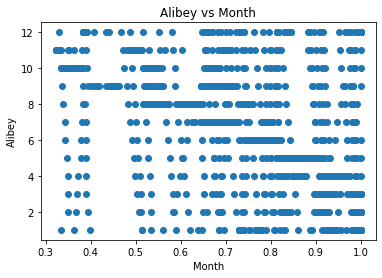

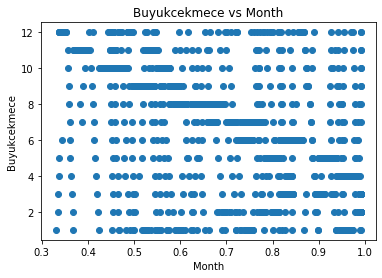

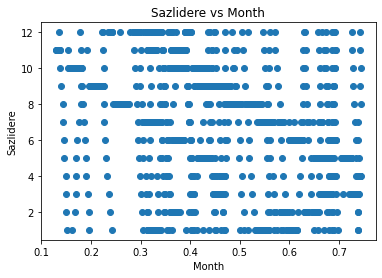

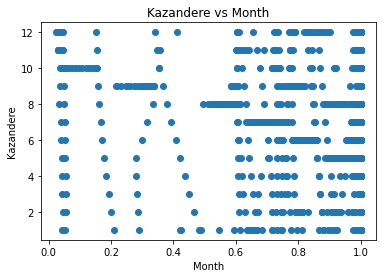

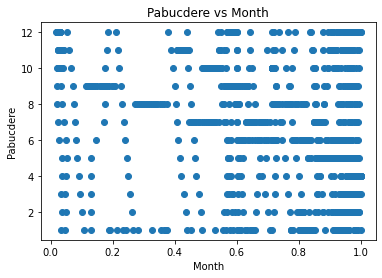

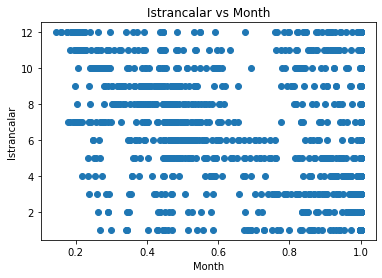

In [73]:
for target in targets:
    plt.scatter(train[target], train[features[0]])
    plt.title(f"{target} vs {features[0]}")
    plt.xlabel(features[0])
    plt.ylabel(target)
    plt.show()

## ML

### Linear Regression

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
X_test = test[features]
y_test = test[targets]

In [53]:
y_pred = model.predict(X_test)

In [59]:
rmse_err = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: ", rmse_err)

mse_err = mean_squared_error(y_test, y_pred)
print("MSE: ", mse_err)

mae_err = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae_err)

r2_err = r2_score(y_test, y_pred)
print("R2: ", r2_err)

RMSE:  0.3775504148773132
MSE:  0.16912356362132447
MAE:  0.3515670874042337
R2:  -22.548778671311428


### Decision Trees

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [ ]:
rmse_err = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: ", rmse_err)

mse_err = mean_squared_error(y_test, y_pred)
print("MSE: ", mse_err)

mae_err = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae_err)

r2_err = r2_score(y_test, y_pred)
print("R2: ", r2_err)

RMSE:  0.37756179868221745
MSE:  0.16926191266440394
MAE:  0.3513518240167151
R2:  -22.60872632426371


### Random Forest

In [61]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred = rf_model.predict(X_test)

In [64]:
rmse_err = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: ", rmse_err)

mse_err = mean_squared_error(y_test, y_pred)
print("MSE: ", mse_err)

mae_err = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae_err)

r2_err = r2_score(y_test, y_pred)
print("R2: ", r2_err)

RMSE:  0.3772545341372799
MSE:  0.1690018937028704
MAE:  0.35104500416445694
R2:  -22.563984091074115


-------

#### I choose Linear Regression or Decision Trees for this problem. The other algorithms just a proof for the error is not that big. Our dataset is not that large and does not have much columns so we don't need to use complex models or ensembling methods like stacking or bagging. Linear regression is fast and simple algorithm and very interpretable. But need to be linear relation between target and features. If there is no linearity between feature and target variables we can use decision trees. Decision trees can be a good choice for smaller datasets like this one, as they're not as computationally expensive as some other models and can handle non-linear relationships between the features and the target. In general we use supervised techniques and regression algorithms in these techniques. Because we have numerical target variable. Maybe another approach for this problem could be time series method. BUt the data is monthly so maybe it wouldn't be appropriate for this problem.


-------